In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import statsmodels.api as sm

# Reading csv file

In [2]:
df = pd.read_csv("50_startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


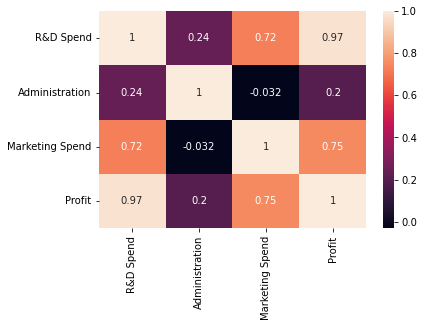

In [4]:
sns.heatmap(df.corr(),annot=True)
plt.show()

R&D Spend and Profit is highly correlated.
Marketing Spend & R&D Spend and R&D Spend & profit is also highly correlated.

In [5]:
sns.set(style='ticks')

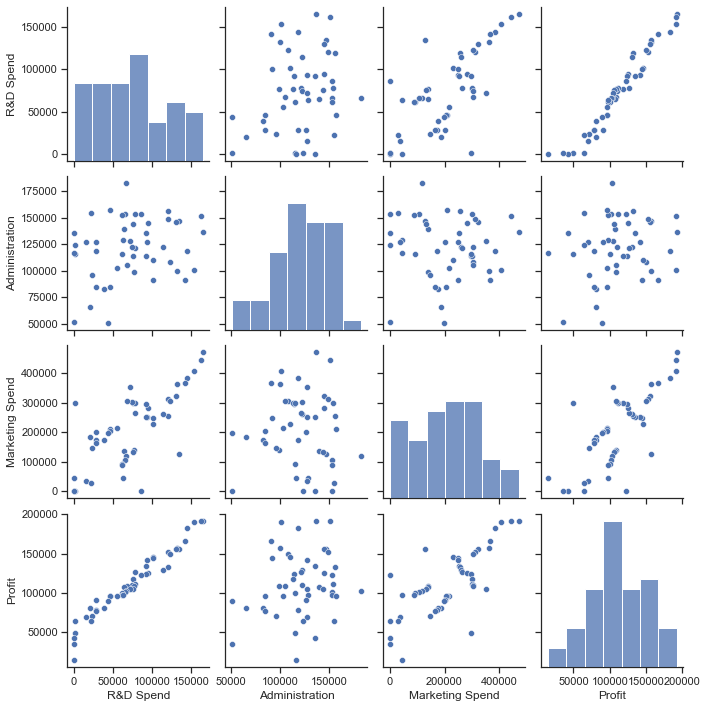

In [6]:
sns.pairplot(df)

In [7]:
df=df.rename(columns=({'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}), inplace = False)

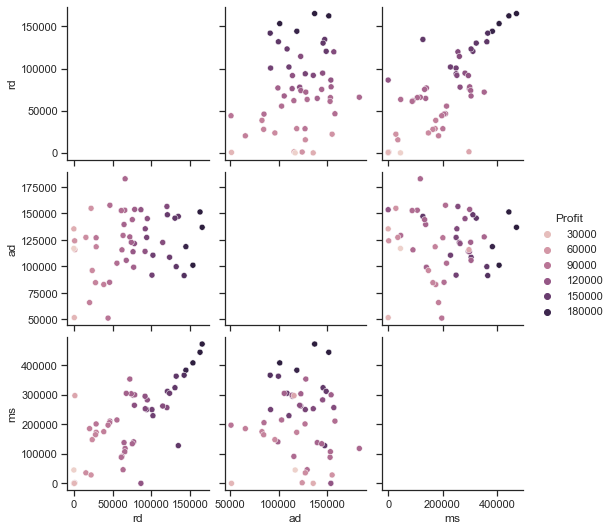

In [8]:
sns.pairplot(df,hue='Profit')

array([[<AxesSubplot:title={'center':'rd'}>,
        <AxesSubplot:title={'center':'ad'}>],
       [<AxesSubplot:title={'center':'ms'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

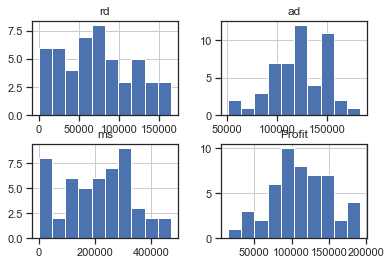

In [9]:
df.hist()

In [10]:
Investment = df.loc[:,['rd','ad','ms']]
Investment.head()

,rd,ad,ms
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
Investment['Total Investment']= Investment.sum(axis=1)
Investment

,rd,ad,ms,Total Investment
0,165349.20,136897.80,471784.10,774031.10
1,162597.70,151377.59,443898.53,757873.82
2,153441.51,101145.55,407934.54,662521.60
3,144372.41,118671.85,383199.62,646243.88
4,142107.34,91391.77,366168.42,599667.53
5,131876.90,99814.71,362861.36,594552.97
6,134615.46,147198.87,127716.82,409531.15
7,130298.13,145530.06,323876.68,599704.87
8,120542.52,148718.95,311613.29,580874.76
9,123334.88,108679.17,304981.62,536995.67


In [12]:
Investment['Total Investment'].mean()


406091.35300000006

In [13]:
df.Profit.mean()

112012.63920000002

# dividing data frame into independent and dependent variables


In [14]:
import statsmodels.api as sm
X=Investment.drop(["rd","ad","ms"], axis =1)
Y= df["Profit"]
X.head()

,Total Investment
0,774031.10
1,757873.82
2,662521.60
3,646243.88
4,599667.53


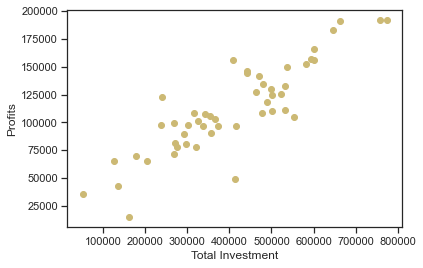

In [15]:
plt.scatter(X,Y,color='y') 
 
plt.xlabel('Total Investment')
plt.ylabel('Profits')


plt.show()

In [16]:

X.head()

,Total Investment
0,774031.10
1,757873.82
2,662521.60
3,646243.88
4,599667.53


In [17]:

Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [18]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1462.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    3.77e-38
Time:                        15:22:09   Log-Likelihood:                         -569.53
No. Observations:                  50   AIC:                                      1141.
Df Residuals:                      49   BIC:                                      1143.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Investment     0.2678      0.007     38.242      0.000       0.254       0.282
==============================================================================
Omnibus:                        4.018   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.461
Skew:                          -0.287   Prob(JB):                        0.177
Kurtosis:                       4.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

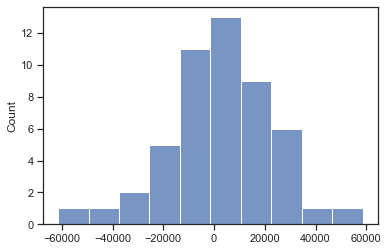

In [19]:
import seaborn as sns
sns.histplot(model_result.resid);

In [20]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

(3262.7288962166217, 21159.812464891773)

# Divide the data into train set and test set  


In [21]:
X_train, X_test , Y_train , Y_test =train_test_split(X,Y,test_size = 0.30, random_state = 1)

In [22]:
X_train[0:5]

,Total Investment
42,267831.67
49,162156.86
26,353514.92
22,500096.57
13,480152.39


In [23]:
Y_train[0:5]

42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
Name: Profit, dtype: float64

In [24]:
Y_train[0:5]

42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
Name: Profit, dtype: float64

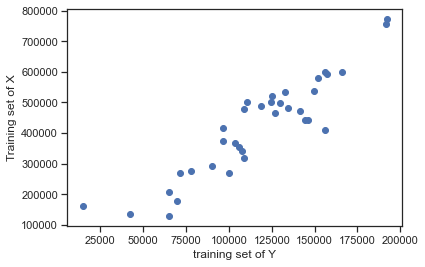

In [25]:
plt.scatter(Y_train, X_train,color='b') 
 
plt.xlabel('training set of Y')
plt.ylabel('Training set of X')


plt.show()

In [26]:
X_test[0:5]

,Total Investment
27,553155.96
35,336579.10
40,320096.05
38,271442.62
2,662521.60


In [27]:
Y_test[0:5]

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
Name: Profit, dtype: float64

# linear regression and building model

In [28]:
lm= LinearRegression()

In [29]:
model= lm.fit(X_train,Y_train)


# assinging prediction values to y_pred value


In [30]:
Y_pred = lm.predict(X_test)

In [31]:
#esimated and actual values
df_comp = pd.DataFrame ({'Actual Values':Y_test, 'Estimates':Y_pred})
df_comp

,Actual Values,Estimates
27,105008.31,146296.861063
35,96479.51,97303.650984
40,78239.91,93574.916846
38,81229.06,82568.719244
2,191050.39,171037.148534
3,182901.99,167354.863383
48,35673.41,32991.744500
29,101004.64,94859.795868
46,49490.75,114873.197043
31,97483.56,89494.083865


# Regression metrics

In [32]:
#mean absolute erroe
MAE = mean_absolute_error(Y_test,Y_pred)
MAE

19649.412702622823

In [33]:
#mean squared error
MSE = mean_squared_error(Y_test,Y_pred)
MSE


719505361.5304301

In [34]:
RMSE = math.sqrt(MSE)
RMSE

26823.59710274575

In [35]:
model.score(X,Y)

0.7592600653700642

# scattering plot  with test cases  values with predicts


In [36]:
Y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
Name: Profit, dtype: float64

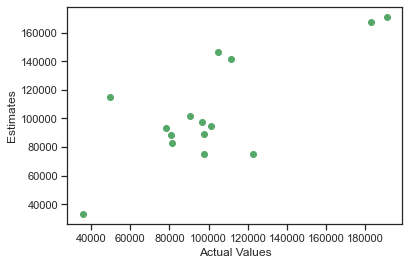

In [37]:
plt.scatter(Y_test, Y_pred,color='g') 
 
plt.xlabel('Actual Values')
plt.ylabel('Estimates')


plt.show()